In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

import numpy as np

def load_data_files():
    movies = pd.read_csv("../moviedata/movies.csv")
    ratings = pd.read_csv("../moviedata/ratings.csv")
    return movies, ratings

movies, ratings = load_data_files()

In [2]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119


In [2]:
movies.drop_duplicates("title", inplace=True)




In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86330 entries, 0 to 86536
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  86330 non-null  int64 
 1   title    86330 non-null  object
 2   genres   86330 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB


In [3]:
merged = ratings.merge(movies, on="movieId")

In [72]:

merged.head()



,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,1225734739,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,110,4.0,1225865086,Braveheart (1995),Action|Drama|War
2,1,158,4.0,1225733503,Casper (1995),Adventure|Children
3,1,260,4.5,1225735204,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
4,1,356,5.0,1225735119,Forrest Gump (1994),Comedy|Drama|Romance|War


In [4]:
merged=merged[merged["timestamp"]%10==0]

In [5]:
merged.head()

,userId,movieId,rating,timestamp,title,genres
12,1,1210,4.5,1225735210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi
20,1,1959,4.0,1225734190,Out of Africa (1985),Drama|Romance
43,1,7122,4.0,1225736170,King of Hearts (1966),Comedy|Drama|War
156,3,2959,5.0,1536173840,Fight Club (1999),Action|Crime|Drama|Thriller
199,4,46578,4.0,1442456140,Little Miss Sunshine (2006),Adventure|Comedy|Drama


In [6]:
x = merged.groupby("userId").count()
x = x[(x["rating"]>80) & (x["rating"]<200)]
expert_users=x.index
merged_xu = merged[merged["userId"].isin(expert_users)]



In [76]:
merged_xu

,userId,movieId,rating,timestamp,title,genres
13584,149,31,3.5,1118371520,Dangerous Minds (1995),Drama
13589,149,48,0.5,1117130520,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
13607,149,208,3.0,1117142320,Waterworld (1995),Action|Adventure|Sci-Fi
13608,149,216,0.5,1117595840,Billy Madison (1995),Comedy
13615,149,262,3.0,1117143780,"Little Princess, A (1995)",Children|Drama
...,...,...,...,...,...,...
33821576,330914,215525,2.0,1615953240,Artemis Fowl (2020),Adventure|Children|Fantasy|Sci-Fi
33821586,330914,231413,5.0,1682070100,Demon Slayer the Movie: Mugen Train (2020),Action|Adventure|Animation|Drama|Fantasy
33821589,330914,249180,4.5,1682069870,Violet Evergarden: The Movie (2020),Animation|Drama|Fantasy|Romance
33821590,330914,250546,4.5,1622894330,Friends: The Reunion (2021),Comedy|Documentary


In [77]:
merged_xu.head()

,userId,movieId,rating,timestamp,title,genres
13584,149,31,3.5,1118371520,Dangerous Minds (1995),Drama
13589,149,48,0.5,1117130520,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
13607,149,208,3.0,1117142320,Waterworld (1995),Action|Adventure|Sci-Fi
13608,149,216,0.5,1117595840,Billy Madison (1995),Comedy
13615,149,262,3.0,1117143780,"Little Princess, A (1995)",Children|Drama


In [7]:
y = merged_xu.groupby("title").count()["rating"]>100
pop_films=y[y].index

merged_xu_pf = merged_xu[merged_xu["title"].isin(pop_films)]

In [8]:
merged_xu_pf.head()

,userId,movieId,rating,timestamp,title,genres
13584,149,31,3.5,1118371520,Dangerous Minds (1995),Drama
13589,149,48,0.5,1117130520,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
13607,149,208,3.0,1117142320,Waterworld (1995),Action|Adventure|Sci-Fi
13608,149,216,0.5,1117595840,Billy Madison (1995),Comedy
13630,149,342,4.0,1117130480,Muriel's Wedding (1994),Comedy


In [12]:
merged.index

Index([      12,       20,       43,      156,      199,      206,      216,
            225,      236,      241,
       ...
       33828360, 33828369, 33828383, 33828384, 33828392, 33828393, 33828408,
       33828448, 33828449, 33828455],
      dtype='int64', length=3381112)

In [9]:
set_of_genres=set()

for j in merged_xu_pf.index:    
    lista=merged_xu_pf["genres"][j].split("|")
    for word in lista:
        set_of_genres.add(word)

print(set_of_genres)

number_of_genres=len(set_of_genres)
number_of_genres

{'War', 'IMAX', 'Film-Noir', 'Adventure', 'Documentary', 'Action', 'Children', 'Crime', 'Thriller', 'Horror', 'Comedy', 'Fantasy', 'Western', 'Sci-Fi', 'Romance', 'Mystery', 'Musical', 'Drama', 'Animation'}


19

In [10]:
# Tar ca 3 minuter
for k in set_of_genres:
    merged_xu_pf[k]=np.where(merged_xu_pf["genres"].str.contains(k),1,0)

C:\Users\Björn ITHS\AppData\Local\Temp\ipykernel_20132\4268190713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_xu_pf[k]=np.where(merged_xu_pf["genres"].str.contains(k),1,0)
C:\Users\Björn ITHS\AppData\Local\Temp\ipykernel_20132\4268190713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_xu_pf[k]=np.where(merged_xu_pf["genres"].str.contains(k),1,0)
C:\Users\Björn ITHS\AppData\Local\Temp\ipykernel_20132\4268190713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [11]:
merged_xu_pf.head()


,userId,movieId,rating,timestamp,title,genres,War,IMAX,Film-Noir,Adventure,...,Horror,Comedy,Fantasy,Western,Sci-Fi,Romance,Mystery,Musical,Drama,Animation
13584,149,31,3.5,1118371520,Dangerous Minds (1995),Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13589,149,48,0.5,1117130520,Pocahontas (1995),Animation|Children|Drama|Musical|Romance,0,0,0,0,...,0,0,0,0,0,1,0,1,1,1
13607,149,208,3.0,1117142320,Waterworld (1995),Action|Adventure|Sci-Fi,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
13608,149,216,0.5,1117595840,Billy Madison (1995),Comedy,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
13630,149,342,4.0,1117130480,Muriel's Wedding (1994),Comedy,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [12]:
merged_xu_pf["year"]=merged_xu_pf["title"].str[-5:-1]

C:\Users\Björn ITHS\AppData\Local\Temp\ipykernel_20132\2653649772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_xu_pf["year"]=merged_xu_pf["title"].str[-5:-1]


In [13]:
merged_xu_pf.info()


<class 'pandas.core.frame.DataFrame'>
Index: 323069 entries, 13584 to 33821566
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   userId       323069 non-null  int64  
 1   movieId      323069 non-null  int64  
 2   rating       323069 non-null  float64
 3   timestamp    323069 non-null  int64  
 4   title        323069 non-null  object 
 5   genres       323069 non-null  object 
 6   War          323069 non-null  int64  
 7   IMAX         323069 non-null  int64  
 8   Film-Noir    323069 non-null  int64  
 9   Adventure    323069 non-null  int64  
 10  Documentary  323069 non-null  int64  
 11  Action       323069 non-null  int64  
 12  Children     323069 non-null  int64  
 13  Crime        323069 non-null  int64  
 14  Thriller     323069 non-null  int64  
 15  Horror       323069 non-null  int64  
 16  Comedy       323069 non-null  int64  
 17  Fantasy      323069 non-null  int64  
 18  Western      323069 non

In [14]:
merged_xu_pf=merged_xu_pf[merged_xu_pf["year"].str.isnumeric()]



In [15]:
merged_xu_pf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322954 entries, 13584 to 33821566
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   userId       322954 non-null  int64  
 1   movieId      322954 non-null  int64  
 2   rating       322954 non-null  float64
 3   timestamp    322954 non-null  int64  
 4   title        322954 non-null  object 
 5   genres       322954 non-null  object 
 6   War          322954 non-null  int64  
 7   IMAX         322954 non-null  int64  
 8   Film-Noir    322954 non-null  int64  
 9   Adventure    322954 non-null  int64  
 10  Documentary  322954 non-null  int64  
 11  Action       322954 non-null  int64  
 12  Children     322954 non-null  int64  
 13  Crime        322954 non-null  int64  
 14  Thriller     322954 non-null  int64  
 15  Horror       322954 non-null  int64  
 16  Comedy       322954 non-null  int64  
 17  Fantasy      322954 non-null  int64  
 18  Western      322954 non

In [16]:
merged_xu_pf["year"]=merged_xu_pf["year"].astype(int)

In [17]:
merged_xu_pf.head()


,userId,movieId,rating,timestamp,title,genres,War,IMAX,Film-Noir,Adventure,...,Comedy,Fantasy,Western,Sci-Fi,Romance,Mystery,Musical,Drama,Animation,year
13584,149,31,3.5,1118371520,Dangerous Minds (1995),Drama,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1995
13589,149,48,0.5,1117130520,Pocahontas (1995),Animation|Children|Drama|Musical|Romance,0,0,0,0,...,0,0,0,0,1,0,1,1,1,1995
13607,149,208,3.0,1117142320,Waterworld (1995),Action|Adventure|Sci-Fi,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1995
13608,149,216,0.5,1117595840,Billy Madison (1995),Comedy,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1995
13630,149,342,4.0,1117130480,Muriel's Wedding (1994),Comedy,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1994


In [18]:
design_matrix = merged_xu_pf.pivot_table(index="title", columns=["userId"], values="rating")

design_matrix.fillna(0, inplace=True)
design_matrix.head()

userId,149,198,305,440,461,527,559,562,677,847,...,330371,330429,330507,330532,330687,330750,330771,330842,330908,330914
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Cloverfield Lane (2016),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
for j in range(6,6+number_of_genres):
    new_df=pd.DataFrame(merged_xu_pf.groupby("title")[merged_xu_pf.columns[j]].sum())
    design_matrix=new_df.merge(design_matrix, on="title")

design_matrix.head()

,Animation,Drama,Musical,Mystery,Romance,Sci-Fi,Western,Fantasy,Comedy,Horror,...,330371,330429,330507,330532,330687,330750,330771,330842,330908,330914
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),0,186,0,0,186,0,0,0,186,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Cloverfield Lane (2016),0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0
10 Things I Hate About You (1999),0,0,0,0,225,0,0,0,225,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),0,0,0,0,0,0,0,0,159,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (One Hundred and One Dalmatians) (1961),215,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
design_matrix["year"]=design_matrix.index.str[-5:-1]
design_matrix=design_matrix[design_matrix["year"].str.isnumeric()]


In [21]:
design_matrix["year"]=design_matrix["year"].astype(int)
design_matrix.head()

,Animation,Drama,Musical,Mystery,Romance,Sci-Fi,Western,Fantasy,Comedy,Horror,...,330429,330507,330532,330687,330750,330771,330842,330908,330914,year
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),0,186,0,0,186,0,0,0,186,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009
10 Cloverfield Lane (2016),0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,2016
10 Things I Hate About You (1999),0,0,0,0,225,0,0,0,225,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1999
101 Dalmatians (1996),0,0,0,0,0,0,0,0,159,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1996
101 Dalmatians (One Hundred and One Dalmatians) (1961),215,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1961


In [20]:
design_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1646 entries, (500) Days of Summer (2009) to ¡Three Amigos! (1986)
Columns: 5013 entries, Western to year
dtypes: float64(4993), int64(20)
memory usage: 63.0+ MB


In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

design_matrix.columns = design_matrix.columns.astype(str)

scaler = StandardScaler(with_mean=True, with_std=True)
design_matrix_scal = scaler.fit_transform(design_matrix)

scaler = MinMaxScaler()
design_matrix_scal_mm = scaler.fit_transform(design_matrix_scal)


In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1500)
design_matrix_scal_mm_pca=pca.fit_transform(design_matrix_scal_mm)


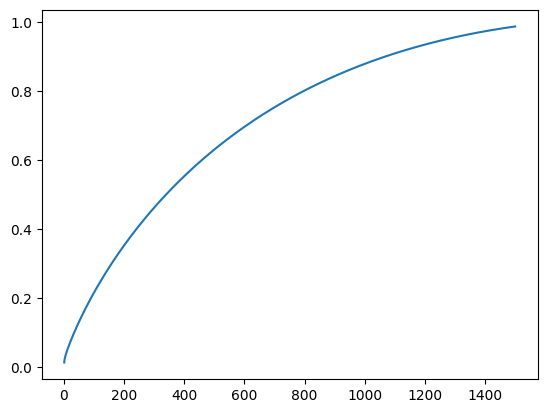

In [59]:
import matplotlib.pyplot as plt

pve=np.cumsum(pca.explained_variance_ratio_)

fig, ax=plt.figure(), plt.axes()
ax.plot(range(1, len(pve)+1), pve)


In [62]:
df_scaled=pd.DataFrame(design_matrix_scal_mm_pca)
df_scaled

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,-0.108051,1.131114,0.674472,-0.128672,-0.558430,0.239467,-0.661470,-0.421332,0.098896,-0.533167,...,0.038687,0.180609,0.230685,0.008123,0.065600,0.048345,0.022702,0.001653,-0.128885,-0.121901
1,-0.400114,1.367198,0.117545,-0.452670,0.367363,0.739524,0.097537,0.817998,0.225104,0.566375,...,-0.081742,-0.028278,0.167794,0.032766,-0.002961,-0.083512,0.099372,-0.039376,-0.045721,-0.025511
2,-0.105048,-0.000469,-0.629686,-0.216365,-0.939677,0.114886,0.467031,-0.363751,-0.145985,-0.739964,...,-0.043654,0.098800,0.005395,-0.036886,-0.019447,-0.125892,-0.013117,-0.058215,-0.007759,-0.060639
3,-0.869610,-0.179169,-0.346428,0.054173,-0.429611,0.346209,-0.027631,0.041712,-0.159700,-0.085191,...,-0.427745,-0.030120,0.044606,0.158006,0.239138,-0.350969,0.014589,-0.093374,-0.106780,-0.160909
4,-0.130657,-0.659018,-0.188153,0.960358,-0.711673,0.760908,0.127998,-0.256303,-0.365386,0.102417,...,0.008275,0.079734,0.057107,-0.029849,-0.061174,0.209428,0.077731,0.034486,0.029300,-0.042820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,0.295758,0.207592,0.177525,-0.344748,-0.444012,-0.359774,-0.005090,0.227096,-0.445817,-0.552748,...,0.052892,0.136065,-0.001393,0.051994,0.045603,0.034607,-0.053261,-0.028279,0.022625,-0.020757
1642,-0.513479,1.438611,0.063809,0.481940,-0.614202,0.200441,0.063196,0.326311,0.483783,0.067176,...,0.174716,-0.084000,0.007822,0.076211,-0.016796,0.138083,-0.020115,-0.074484,0.005518,-0.020324
1643,-0.806816,-0.242895,0.291895,-0.108596,0.585722,-0.167938,-0.017975,-0.025289,-0.373929,0.347681,...,-0.160406,0.284796,-0.016903,0.096864,-0.257768,0.198615,0.006781,-0.243587,-0.018782,0.034592
1644,-0.579433,0.337369,-0.790912,-0.229832,0.356570,-0.215243,-0.076294,-0.278041,-0.008588,-0.140497,...,0.169875,-0.278301,-0.246195,0.018050,-0.113193,-0.002352,0.079162,-0.018989,-0.103308,-0.011082


In [68]:
similarity_score = cosine_similarity(design_matrix_scal_mm_pca)
similarity_score

array([[ 1.00000000e+00,  3.82445267e-02,  7.39851207e-03, ...,
        -1.44067953e-02, -1.58659919e-02, -1.36439271e-02],
       [ 3.82445267e-02,  1.00000000e+00, -1.32539211e-02, ...,
         7.09713358e-03, -1.98927777e-03, -2.65024724e-02],
       [ 7.39851207e-03, -1.32539211e-02,  1.00000000e+00, ...,
        -2.23606112e-02,  6.43915547e-03,  8.00774098e-04],
       ...,
       [-1.44067953e-02,  7.09713358e-03, -2.23606112e-02, ...,
         1.00000000e+00,  1.52589014e-03, -2.89568935e-03],
       [-1.58659919e-02, -1.98927777e-03,  6.43915547e-03, ...,
         1.52589014e-03,  1.00000000e+00, -3.77260401e-02],
       [-1.36439271e-02, -2.65024724e-02,  8.00774098e-04, ...,
        -2.89568935e-03, -3.77260401e-02,  1.00000000e+00]],
      shape=(1646, 1646))

In [64]:
def recommend(movie_title):
    index=np.where(design_matrix.index==movie_title)[0][0]
    print(index)
    similar_movies = sorted(list(enumerate(similarity_score[index])), key=lambda x: x[1], reverse=True)[1:6]
    data=[]

    for index, similarity in similar_movies:
        item = []
        temp_df = movies[movies["title"]==design_matrix.index[index]]
        item.extend(temp_df["title"].values)
        data.append(item)

    return data

In [70]:
recommend("Interstellar (2014)")

760


[['Shining, The (1980)'],
 ['Forgetting Sarah Marshall (2008)'],
 ['World War Z (2013)'],
 ['Guardians of the Galaxy (2014)'],
 ['Avengers, The (2012)']]